In [1]:

# Define paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# SIMPLE CNN MODEL

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os


# Define paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Define a simple CNN model

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 5)  # Assuming 5 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
from torchvision.io.image import ImageReadMode

# Define your dataset class
class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
from torchvision.io.image import ImageReadMode
class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = []
        self.labels = []
        self.transform = transform
        for class_label in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_label)
            if class_label in class_label_map:  # Check if it's a valid class label
                for image_file in os.listdir(class_folder_path):
                    if not image_file.startswith('.DS_Store'):  # Skip .DS_Store files
                        self.image_files.append(os.path.join(class_folder_path, image_file))
                        self.labels.append(class_label_map[class_label])  # Convert class label to integer
            else:
                print(f"Ignoring folder '{class_label}' as it is not a valid class label.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = torchvision.io.read_image(self.image_files[idx], mode=ImageReadMode.RGB).float()  # Read image in RGB mode
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Assuming images are in range [0, 1]
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path)
val_dataset = CustomDataset(val_folder_path)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)



Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.


Epoch 1, Train Loss: 115.02870073318482, Validation Accuracy: 23.33%
Epoch 2, Train Loss: 2.0052832841873167, Validation Accuracy: 23.33%
Epoch 3, Train Loss: 1.352509339650472, Validation Accuracy: 29.17%
Epoch 4, Train Loss: 1.1305147568384806, Validation Accuracy: 47.50%
Epoch 5, Train Loss: 0.904027537504832, Validation Accuracy: 49.17%
Epoch 6, Train Loss: 0.7312122344970703, Validation Accuracy: 61.67%
Epoch 7, Train Loss: 0.4826150298118591, Validation Accuracy: 61.67%
Epoch 8, Train Loss: 0.3047479838132858, Validation Accuracy: 75.00%
Epoch 9, Train Loss: 0.15488835150996844, Validation Accuracy: 75.83%
Epoch 10, Train Loss: 0.11981517920891444, Validation Accuracy: 75.00%
Total Training Time: 296.57 seconds


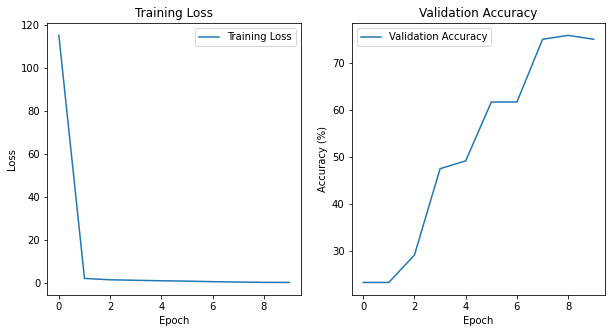

In [5]:
import time
import matplotlib.pyplot as plt

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store training loss and validation accuracy
train_losses = []
val_accuracies = []

# Track time for training
start_time = time.time()

# Train the model
for epoch in range(10):  # Train for 10 epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Compute training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Compute validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = (correct / total) * 100
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Calculate total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()


# CNN WITH MULTIPLE LAYERS 

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os


class SimpleCNNWithSoftmax(nn.Module):
    def __init__(self):
        super(SimpleCNNWithSoftmax, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 14 * 14, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 5)  # Assuming 5 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        x = self.softmax(x)
        return x


class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
from torchvision.io.image import ImageReadMode
class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = []
        self.labels = []
        self.transform = transform
        for class_label in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_label)
            if class_label in class_label_map:  # Check if it's a valid class label
                for image_file in os.listdir(class_folder_path):
                    if not image_file.startswith('.DS_Store'):  # Skip .DS_Store files
                        self.image_files.append(os.path.join(class_folder_path, image_file))
                        self.labels.append(class_label_map[class_label])  # Convert class label to integer
            else:
                print(f"Ignoring folder '{class_label}' as it is not a valid class label.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = torchvision.io.read_image(self.image_files[idx], mode=ImageReadMode.RGB).float()  # Read image in RGB mode
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Assuming images are in range [0, 1]
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path)
val_dataset = CustomDataset(val_folder_path)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.


Epoch 1, Train Loss: 1.7016712109247842, Validation Accuracy: 20.00%
Epoch 2, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 3, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 4, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 5, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 6, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 7, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 8, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 9, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Epoch 10, Train Loss: 1.7048326015472413, Validation Accuracy: 20.00%
Total Training Time: 500.21 seconds


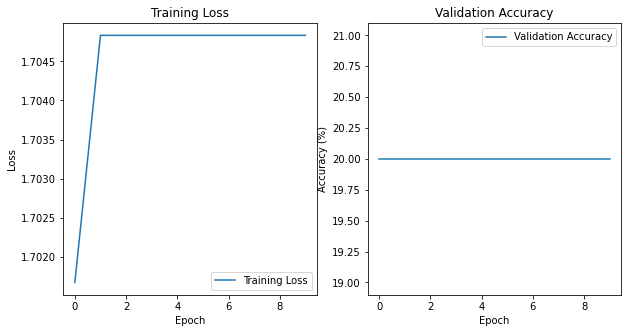

In [7]:
import time
import matplotlib.pyplot as plt

# Initialize the model, loss function, and optimizer
model = SimpleCNNWithSoftmax()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store training loss and validation accuracy
train_losses = []
val_accuracies = []

# Track time for training
start_time = time.time()

# Train the model
for epoch in range(10):  # Train for 10 epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Compute training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Compute validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = (correct / total) * 100
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Calculate total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()



# RESNET

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os

# Define your dataset paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Define your class label mapping
class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}

# Define your ResNet model
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.resnet = torchvision.models.resnet18(pretrained=False)  # Load pre-trained ResNet18 model
        num_classes = 5  # Assuming 5 classes
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Define your dataset class
class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
from torchvision.io.image import ImageReadMode
class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = []
        self.labels = []
        self.transform = transform
        for class_label in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_label)
            if class_label in class_label_map:  # Check if it's a valid class label
                for image_file in os.listdir(class_folder_path):
                    if not image_file.startswith('.DS_Store'):  # Skip .DS_Store files
                        self.image_files.append(os.path.join(class_folder_path, image_file))
                        self.labels.append(class_label_map[class_label])  # Convert class label to integer
            else:
                print(f"Ignoring folder '{class_label}' as it is not a valid class label.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = torchvision.io.read_image(self.image_files[idx], mode=ImageReadMode.RGB).float()  # Read image in RGB mode
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label




# Define transformations for image preprocessing
# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Assuming images are in range [0, 1]
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path, transform=transform)
val_dataset = CustomDataset(val_folder_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)




Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.


/Users/asminahar/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/asminahar/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Train Loss: 1.6514738957087198, Validation Accuracy: 20.00%
Epoch 2, Train Loss: 0.9041398008664449, Validation Accuracy: 22.50%
Epoch 3, Train Loss: 0.7635439395904541, Validation Accuracy: 65.83%
Epoch 4, Train Loss: 0.7341447273890177, Validation Accuracy: 31.67%
Epoch 5, Train Loss: 0.5148684740066528, Validation Accuracy: 51.67%
Epoch 6, Train Loss: 0.37874326507250466, Validation Accuracy: 82.50%
Epoch 7, Train Loss: 0.279580016930898, Validation Accuracy: 78.33%
Epoch 8, Train Loss: 0.2816784863670667, Validation Accuracy: 85.00%
Epoch 9, Train Loss: 0.217979762951533, Validation Accuracy: 84.17%
Epoch 10, Train Loss: 0.17047677064935365, Validation Accuracy: 71.67%
Total Training Time: 643.13 seconds


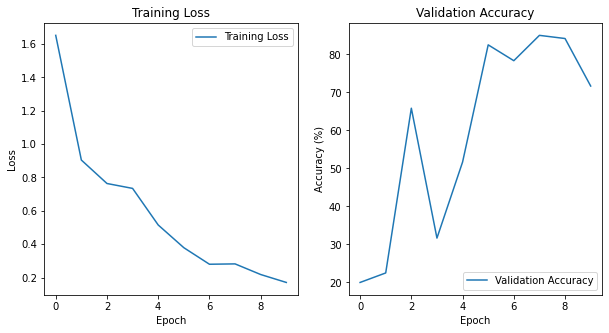

In [9]:
import time
import matplotlib.pyplot as plt

# Initialize the model, loss function, and optimizer
model = ResNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Initialize lists to store training loss and validation accuracy
train_losses = []
val_accuracies = []

# Track time for training
start_time = time.time()

# Train the model
for epoch in range(10):  # Train for 10 epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Compute training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Compute validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = (correct / total) * 100
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Calculate total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# VGG

In [22]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.io.image import ImageReadMode

# Set the paths of the dataset and folders# Set the paths of the dataset and folders
dataset_folder_path = '/Users/asminahar/Documents'
train_folder_path = os.path.join(dataset_folder_path, 'Train Images/')
val_folder_path = os.path.join(dataset_folder_path, 'Val Images/')



# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path, transform=transform)
val_dataset = CustomDataset(val_folder_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

...

# Define your VGG model
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.vgg = torchvision.models.vgg16(pretrained=True)
        num_classes = 5
        self.vgg.classifier[-1] = nn.Linear(self.vgg.classifier[-1].in_features, num_classes)

    def forward(self, x):
        return self.vgg(x)

# Define your dataset class
class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
import os

from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = []
        self.labels = []
        self.transform = transform

        for class_label in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_label)
            if class_label in class_label_map:
                for image_file in os.listdir(class_folder_path):
                    if not image_file.startswith('.DS_Store'):
                        self.image_files.append(os.path.join(class_folder_path, image_file))
                        self.labels.append(class_label_map[class_label])
            else:
                print(f"Ignoring folder '{class_label}' as it is not a valid class label.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        if self.transform:
            image = Image.open(self.image_files[idx]).convert('RGB')
            image = self.transform(image)
        else:
            image = Image.open(self.image_files[idx]).convert('RGB')

        label = self.labels[idx]
        return image, label
# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Assuming images are in range [0, 1]
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path, transform=transform)
val_dataset = CustomDataset(val_folder_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize the model, loss function, and optimizer
model = VGG()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)-

Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.


Epoch 1, Train Loss: 2.022607159614563, Validation Accuracy: 20.00%
Epoch 2, Train Loss: 1.6485132137934366, Validation Accuracy: 21.67%
Epoch 3, Train Loss: 1.6347729285558066, Validation Accuracy: 20.00%
Epoch 4, Train Loss: 1.6346490859985352, Validation Accuracy: 20.83%
Epoch 5, Train Loss: 1.6204860210418701, Validation Accuracy: 20.00%
Epoch 6, Train Loss: 1.7142423232396444, Validation Accuracy: 20.00%
Epoch 7, Train Loss: 1.819914690653483, Validation Accuracy: 20.00%
Epoch 8, Train Loss: 1.624341066678365, Validation Accuracy: 20.00%
Epoch 9, Train Loss: 1.6247636556625367, Validation Accuracy: 20.00%
Epoch 10, Train Loss: 1.6225327650705974, Validation Accuracy: 20.00%
Total Training Time: 10263.18 seconds


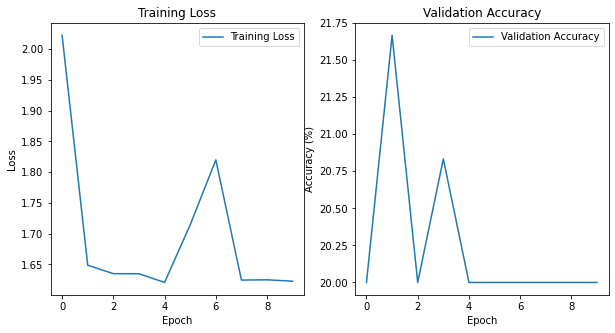

In [24]:
import time
import matplotlib.pyplot as plt


# Initialize lists to store training loss and validation accuracy
train_losses = []
val_accuracies = []

# Track time for training
start_time = time.time()

# Train the model
for epoch in range(10):  # Train for 10 epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Compute training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Compute validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = (correct / total) * 100
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Calculate total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# GOOGLE NET

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Create datasets
train_dataset = ImageFolder(train_folder_path, transform=transform)
val_dataset = ImageFolder(val_folder_path, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the GoogLeNet model
model = GoogLeNet()

# Define loss function and optimizer
# Adjust learning rate and batch size
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduce learning rate
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Reduce batch size


# Track time for training
start_time = time.time()
# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Train Loss: {running_loss / len(train_loader)}")

# Evaluate the model on validation data
model.eval()
val_predictions = []
val_targets = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        val_predictions.extend(predicted.cpu().numpy())
        val_targets.extend(labels.cpu().numpy())

# Calculate validation accuracy
validation_accuracy = accuracy_score(val_targets, val_predictions)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Calculate total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

#Performing this model in another file


# NIN

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os

# Define your dataset paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Define your class label mapping
class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}



# Define your dataset class
class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
from torchvision.io.image import ImageReadMode
class NIN(nn.Module):
    def __init__(self):
        super(NIN, self).__init__()  # Notice the corrected '__init__' here
        self.features = nn.Sequential(
            nn.Conv2d(3, 192, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 160, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(160, 96, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.5),
            
            nn.Conv2d(96, 192, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.5),
            
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 5, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return x



# Define transformations for image preprocessing
# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path, transform=transform)
val_dataset = CustomDataset(val_folder_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize the model, loss function, and optimizer
model = NIN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)






Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.


In [ ]:
import time
import matplotlib.pyplot as plt


# Initialize lists to store training loss and validation accuracy
train_losses = []
val_accuracies = []

# Track time for training
start_time = time.time()

# Train the model
for epoch in range(10):  # Train for 10 epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Compute training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Compute validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = (correct / total) * 100
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Calculate total training time
total_time = time.time() - start_time
print(f"Total Training Time: {total_time:.2f} seconds")

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

Epoch 1, Train Loss: 1.6129833459854126, Validation Accuracy: 20.00%
Epoch 2, Train Loss: 1.6102591435114542, Validation Accuracy: 20.00%
Epoch 3, Train Loss: 1.610010306040446, Validation Accuracy: 20.00%


In [ ]:
import torch.nn.functional as F

class OptimizedNIN(nn.Module):
    def __init__(self, num_classes=5):
        super(OptimizedNIN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 192, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 160, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(160, 96, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.5),
            
            nn.Conv2d(96, 192, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.5),
            
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, num_classes, kernel_size=1, stride=1, padding=0),
            nn.ReLU(inplace=True)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return F.log_softmax(x, dim=1)

# Create the model instance
model = OptimizedNIN()

# You can then continue with the rest of your training pipeline using this optimized model.
